In [1]:
#import geopandas as gpd

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


import numpy as np

In [2]:
data = pd.read_csv("Data_with_Depression.csv").drop(['Pop', 'Unnamed: 0'], axis=1)

In [3]:
data = data.rename(columns={"Shannon_Weiner" : "Diversity Entropy", "Percent_H" : "Percent_Hispanic"})

In [5]:
data.describe()

,Traffic,Hospitals,Police Officers,HealthCare Services,No Emergency Room Services,Dedicated Emergency Department,Number of Roads,Percent_Male,Percent_Hispanic,Percent_WA,Percent_BA,Diversity Entropy,Unemployment_rate_2022,Median_Household_Income_2021,Fentanyl_deaths_2022,Sheriff Officers,Fire Departments per 100000,Hospitalization_From_Depression
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.450440,0.178650,0.288331,0.388551,0.076455,0.225539,0.345383,0.510659,0.158764,0.800701,0.146548,0.395307,0.664020,0.608624,9.860636,0.520154,0.273053,0.473029
std,0.163349,0.175437,0.215839,0.149327,0.150477,0.234462,0.233090,0.029299,0.135380,0.094695,0.091041,0.092876,0.104728,0.122152,7.593508,0.195851,0.241429,0.177682
min,0.181306,0.000000,0.000000,0.025844,0.000000,0.000000,0.083370,0.472951,0.034349,0.421653,0.033157,0.216658,0.404255,0.409446,0.000000,0.181034,0.042382,0.073777
25%,0.333143,0.091629,0.107835,0.301317,0.000000,0.089426,0.160949,0.490395,0.065593,0.771441,0.087529,0.325293,0.595745,0.504226,4.257261,0.351617,0.106667,0.344038
50%,0.412611,0.122016,0.263572,0.385158,0.032291,0.139368,0.269073,0.496432,0.114210,0.822269,0.122423,0.391417,0.659574,0.604741,9.666692,0.496702,0.156175,0.486926
75%,0.585829,0.201853,0.402569,0.453530,0.091816,0.281586,0.444600,0.531906,0.222141,0.865445,0.180905,0.463955,0.712766,0.693620,13.406084,0.639647,0.398648,0.579039
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.612160,0.691173,0.927548,0.548695,0.602110,1.000000,1.000000,34.782288,1.000000,1.000000,1.000000


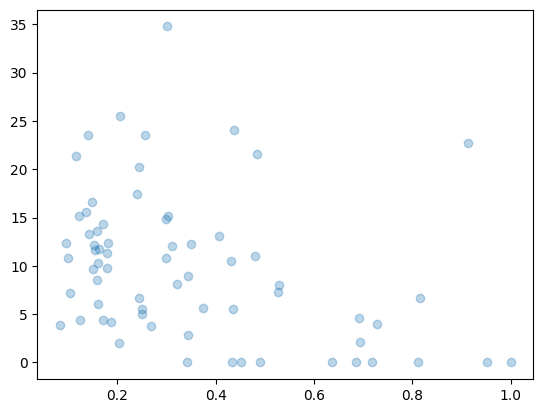

In [6]:
plt.scatter(data['Number of Roads'], data['Fentanyl_deaths_2022'], alpha=0.3)

In [4]:
matrix = data.drop(['Fentanyl_deaths_2022', 'index', ], axis=1)
y = data['Fentanyl_deaths_2022']

# Initialize the logistic regression model
model = RandomForestRegressor(n_estimators=100)

# Initialize the RFE model with the logistic regression model and the number of desired features
num_features_to_select = 5  # You can change this to the number of features you want to keep
rfe = RFE(model, step=1)

# Fit the RFE model to your data
rfe.fit(matrix, y)

# Get the selected features
selected_features = rfe.support_

# You can also get the ranking of each feature, where 1 is the most important
feature_ranking = rfe.ranking_

# Now, you can use the selected features for further analysis
matrix.keys()[selected_features]

Index(['Traffic', 'Hospitals', 'Number of Roads', 'Percent_Hispanic',
       'Diversity Entropy', 'Median_Household_Income_2021', 'Sheriff Officers',
       'Hospitalization_From_Depression'],
      dtype='object')

0.8559838950517161


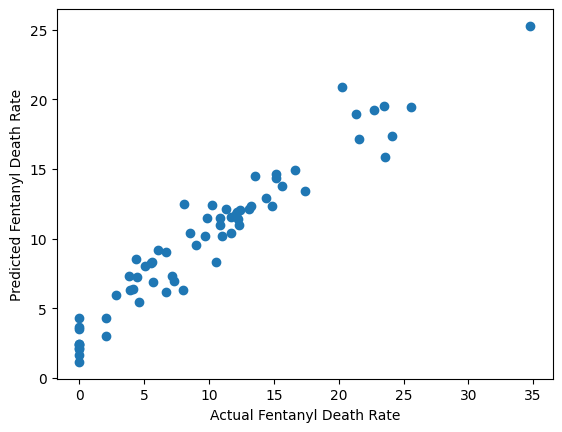

In [5]:
# Here we are retraining a separate random forest model
X = data[list(matrix.keys()[selected_features])]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)
print(r2)

#plotting the predictions
plt.scatter(y_train, y_pred)
plt.xlabel('Actual Fentanyl Death Rate')
plt.ylabel('Predicted Fentanyl Death Rate')
plt.show()

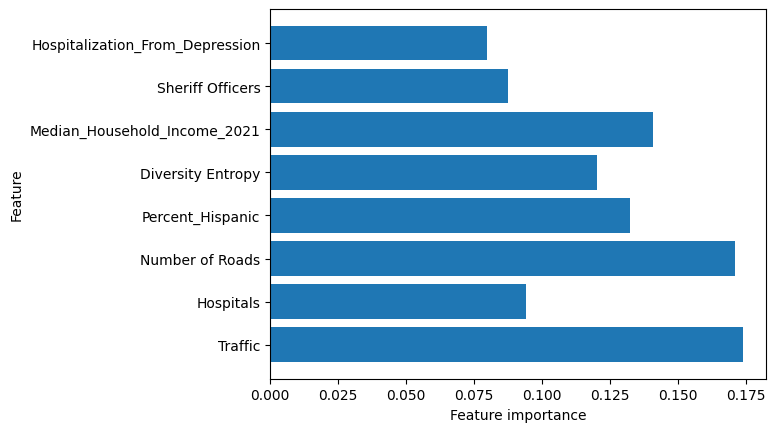

In [6]:
# Showing feature importances
importances = model.feature_importances_
std = np.std([model.feature_importances_ for _ in range(100)], axis=0)
features = X.columns
plt.barh(features, importances, xerr=std, align='center')
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

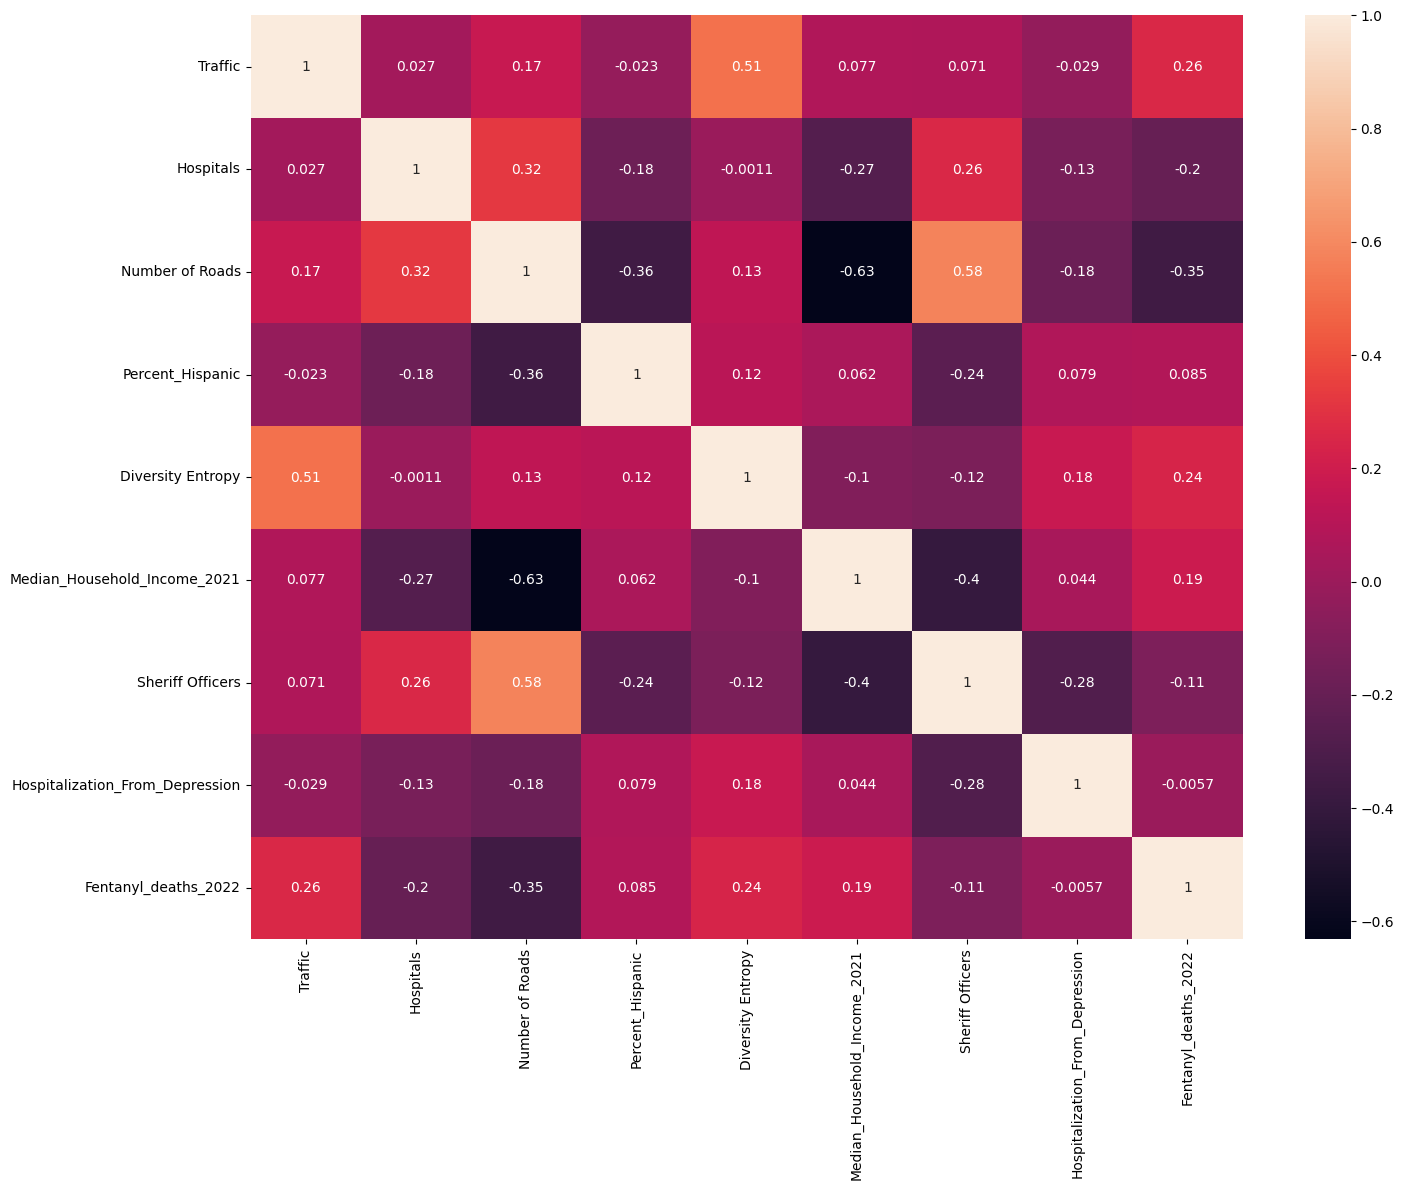

In [7]:
import seaborn as sns

# Correlation plot for chosen features
plt.figure(figsize=(16, 12))
sns.heatmap(data[list(X.columns) + ['Fentanyl_deaths_2022']].corr(), annot=True)
plt.show()

In [8]:
# Load the geographic data for US counties
county_shapes = gpd.read_file('geojson-fl-counties-fips.json')  # Replace with the path to your geographic data file



In [9]:
county_shapes

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,12083,0500000US12083,12,083,Marion,County,1584.546,"POLYGON ((-82.31170 28.96039, -82.42700 29.021..."
1,12087,0500000US12087,12,087,Monroe,County,983.282,"MULTIPOLYGON (((-80.25058 25.34193, -80.25492 ..."
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682..."
3,12111,0500000US12111,12,111,St. Lucie,County,571.926,"POLYGON ((-80.67786 27.20599, -80.67861 27.448..."
4,12119,0500000US12119,12,119,Sumter,County,546.933,"POLYGON ((-81.95419 28.96005, -81.95358 28.820..."
...,...,...,...,...,...,...,...,...
62,12065,0500000US12065,12,065,Jefferson,County,598.095,"POLYGON ((-84.00739 30.67210, -83.88032 30.665..."
63,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634..."
64,12075,0500000US12075,12,075,Levy,County,1118.206,"POLYGON ((-82.40515 29.33026, -82.40459 29.278..."
65,12021,0500000US12021,12,021,Collier,County,1998.324,"POLYGON ((-81.56376 26.51332, -81.27177 26.517..."


In [10]:
# Merge your data with the county shapes data based on county name and state
merged_data = county_shapes.merge(data, left_on=['NAME'], right_on=['index'], how='right')

In [11]:
merged_data.head()

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,index,Traffic,...,Percent_Hispanic,Percent_WA,Percent_BA,Diversity Entropy,Unemployment_rate_2022,Median_Household_Income_2021,Fentanyl_deaths_2022,Sheriff Officers,Fire Departments per 100000,Hospitalization_From_Depression
0,12001,0500000US12001,12,001,Alachua,County,875.020,"POLYGON ((-82.55651 29.51198, -82.65630 29.564...",Alachua,0.578098,...,0.114210,0.697993,0.203845,0.548851,0.595745,0.591642,6.689434,0.290436,0.132995,0.579364
1,12003,0500000US12003,12,003,Baker,County,585.231,"POLYGON ((-82.05003 30.36249, -82.04924 30.273...",Baker,0.520957,...,0.037838,0.833435,0.127792,0.360248,0.595745,0.644335,21.580405,0.834052,0.403923,0.161983
2,12005,0500000US12005,12,005,Bay,County,758.459,"POLYGON ((-85.99608 30.26915, -85.99459 30.290...",Bay,0.731112,...,0.079424,0.812849,0.118001,0.421648,0.574468,0.634954,8.102239,0.521558,0.209553,0.492026
3,12007,0500000US12007,12,007,Bradford,County,293.962,"POLYGON ((-82.04924 29.71867, -82.05563 29.718...",Bradford,0.500313,...,0.048548,0.781642,0.180171,0.412292,0.659574,0.580074,7.322520,0.598486,0.336411,0.513182
4,12009,0500000US12009,12,009,Brevard,County,1015.664,"POLYGON ((-80.63131 28.65519, -80.61679 28.634...",Brevard,0.389528,...,0.120610,0.824617,0.110700,0.400197,0.595745,0.689611,9.830456,0.327896,0.132737,0.629814


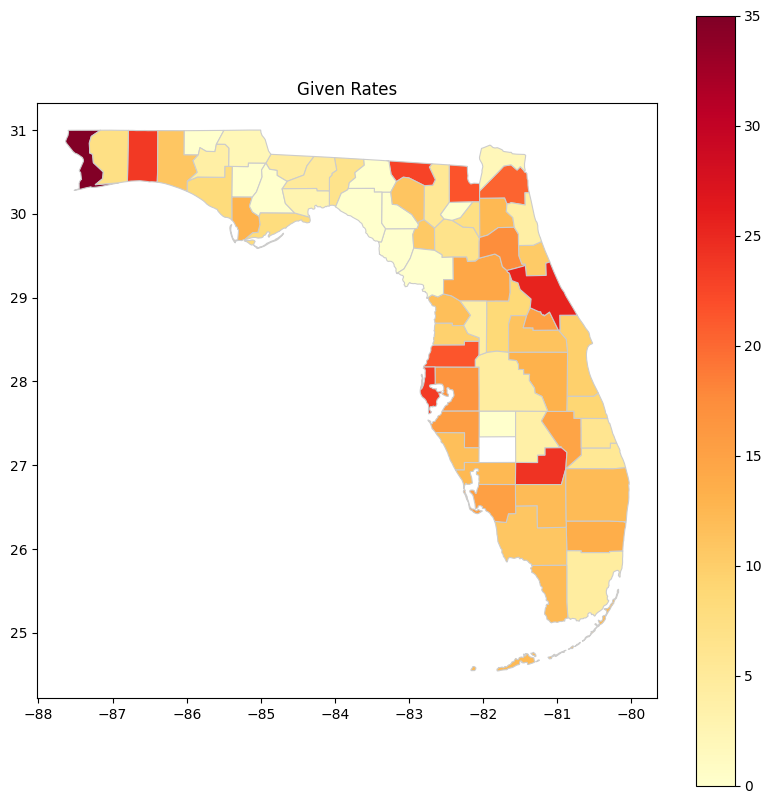

In [12]:
#rates visualized from the data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Given Rates')

plt.show()

In [13]:
set(merged_data['NAME'])-set(data['index'])

{nan}

In [14]:
full_pred = model.predict(data[list(matrix.keys()[selected_features])])

In [15]:
merged_data['Fentanyl_deaths_2022'] = full_pred

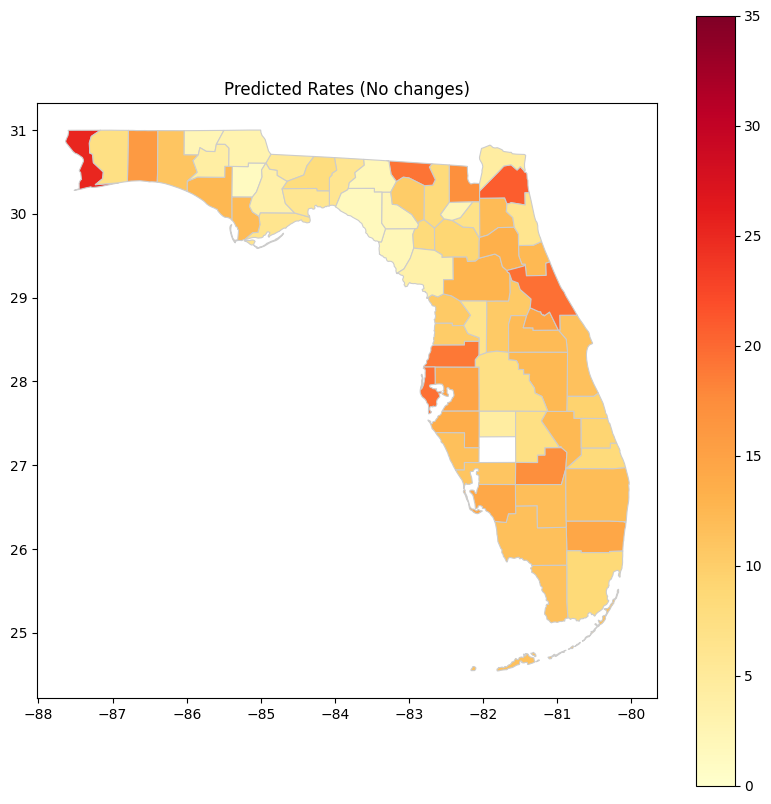

In [16]:
#predicted rates with the base dataset
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (No changes)')

plt.show()

In [17]:
data['Hospitalization_From_Depression'] -= 0.05

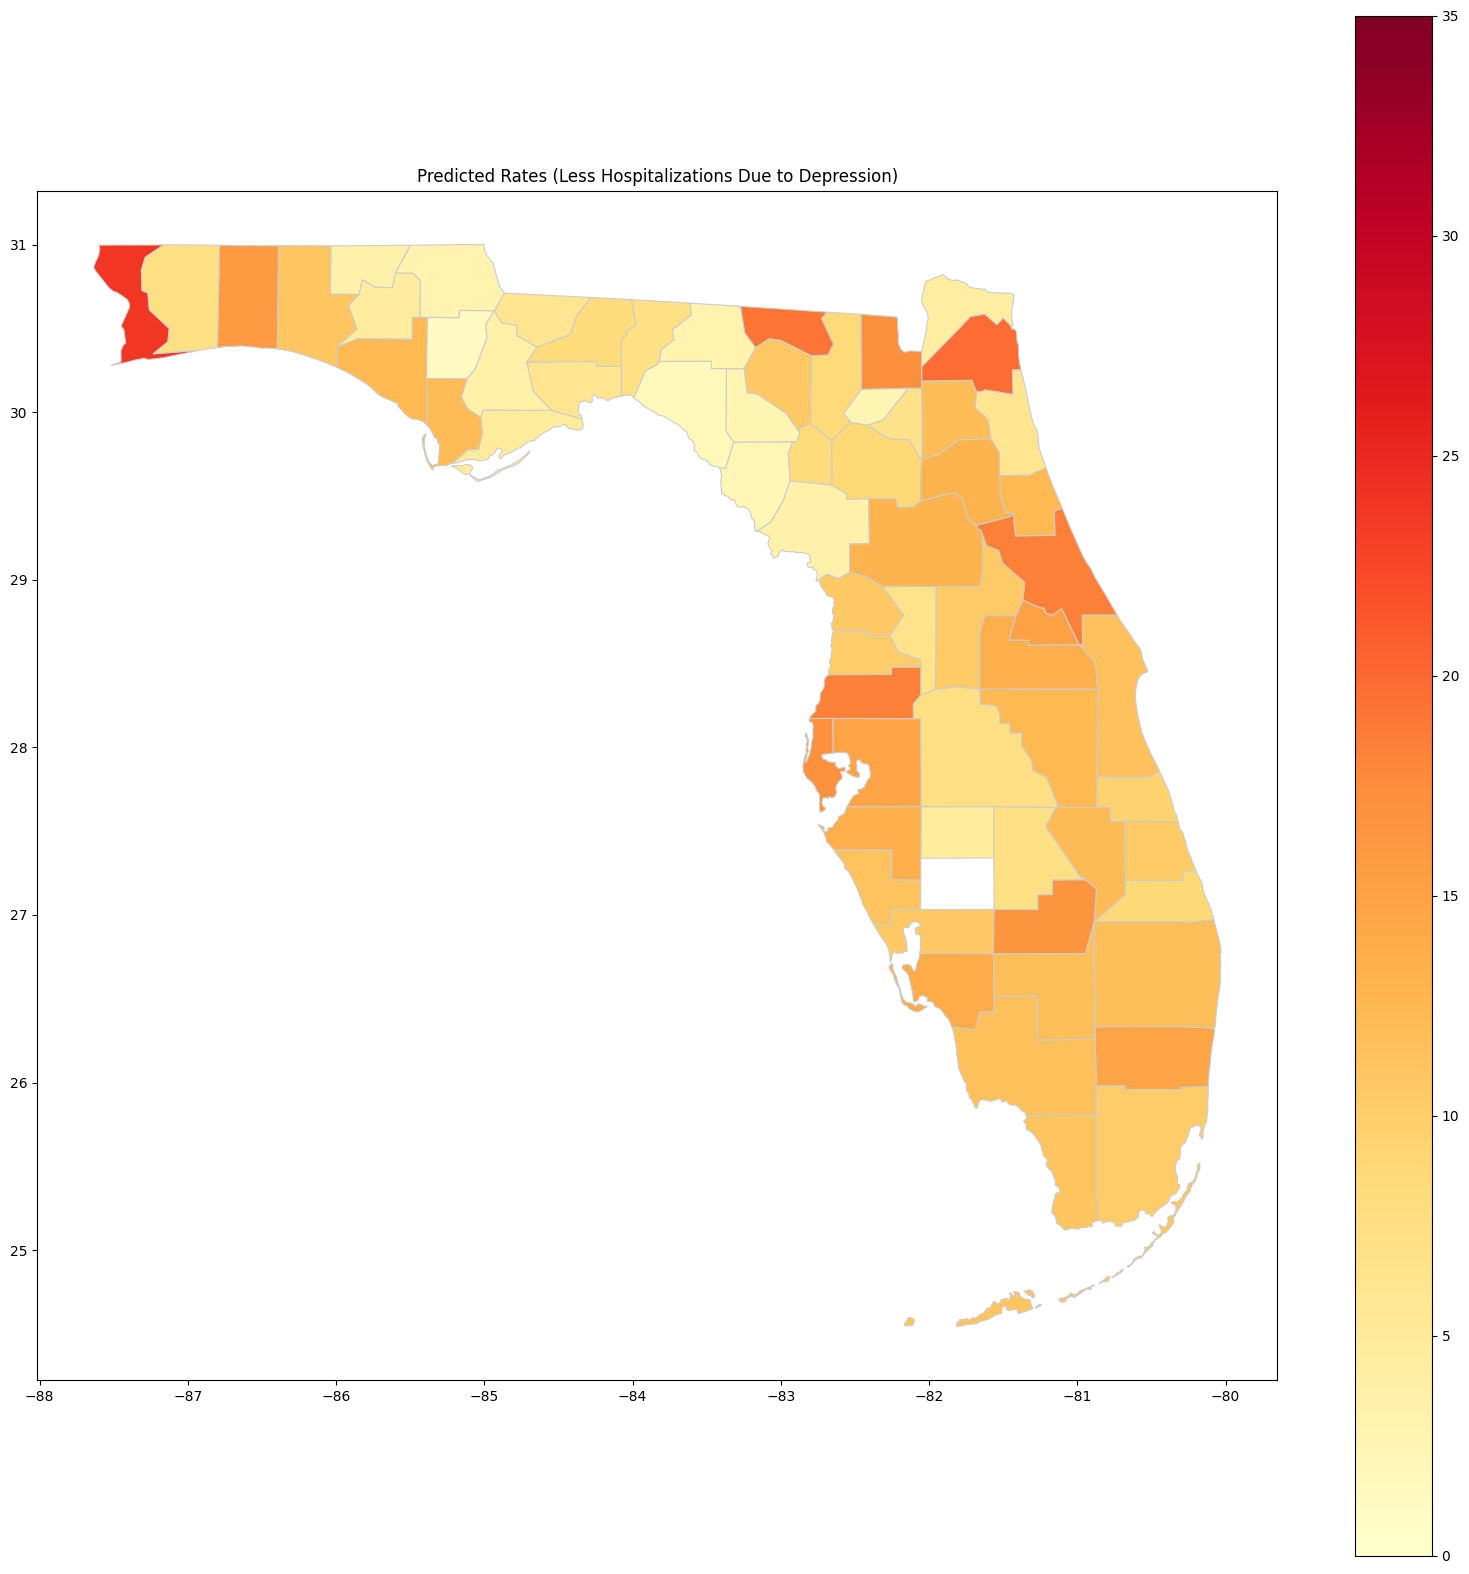

In [18]:
#Predicted rates with 5% less hospitilizations due to depression
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (Less Hospitalizations Due to Depression)')

plt.show()

In [19]:
data['Hospitalization_From_Depression'] += 0.05
data['Traffic'] -= 0.1

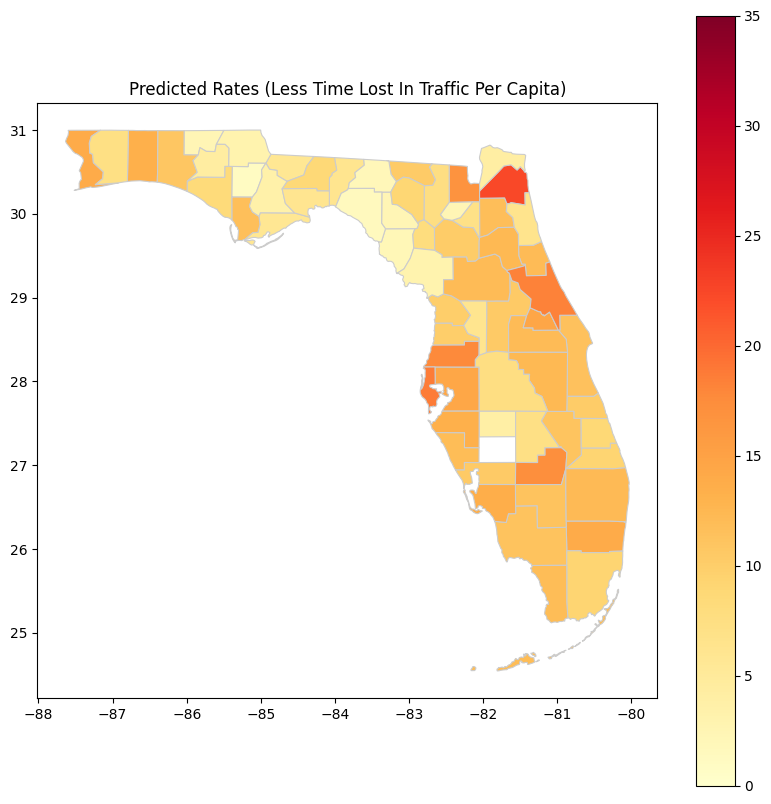

In [20]:
#Predicted rates with 10% less time lost in traffic per capita
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (Less Time Lost In Traffic Per Capita)')

plt.show()

In [21]:
data['Traffic'] += 0.1
data['Sheriff Officers'] += 0.07

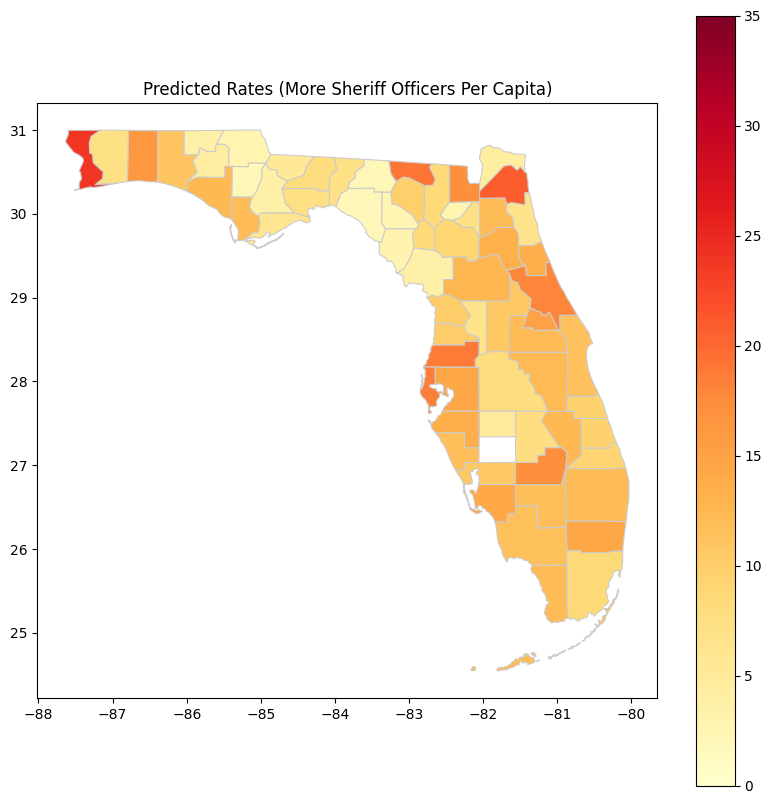

In [22]:
#Predicted rates with 7% more sheriffs per capita
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (More Sheriff Officers Per Capita)')

plt.show()

In [23]:
data['Sheriff Officers'] -= 0.07
data['Hospitals'] += 0.1

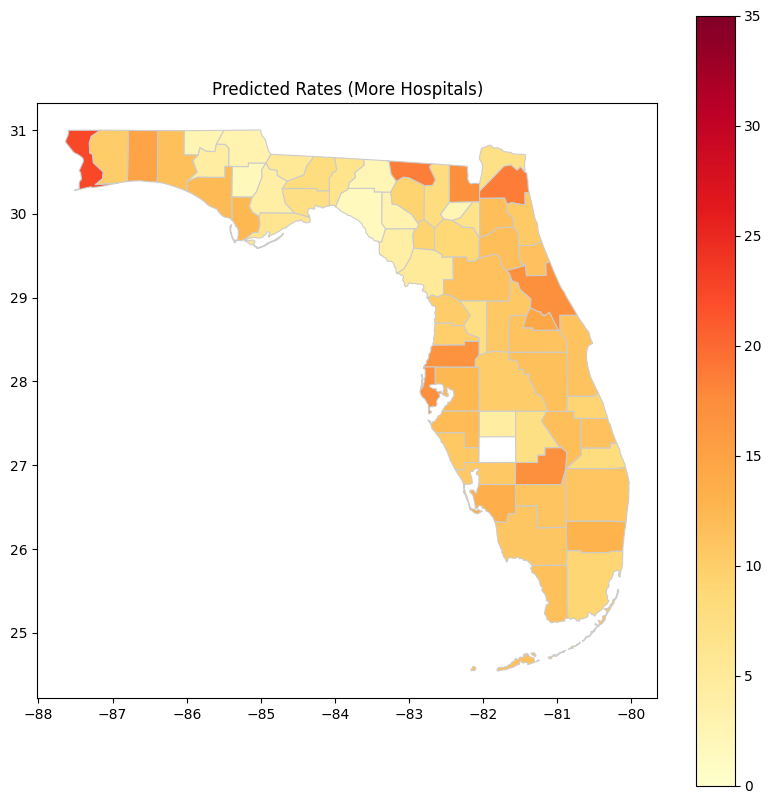

In [24]:
#Predicted rates with 10% more hospitals
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (More Hospitals)')

plt.show()

In [25]:
data['Hospitals'] -= 0.1
data['Number of Roads'] += 0.1

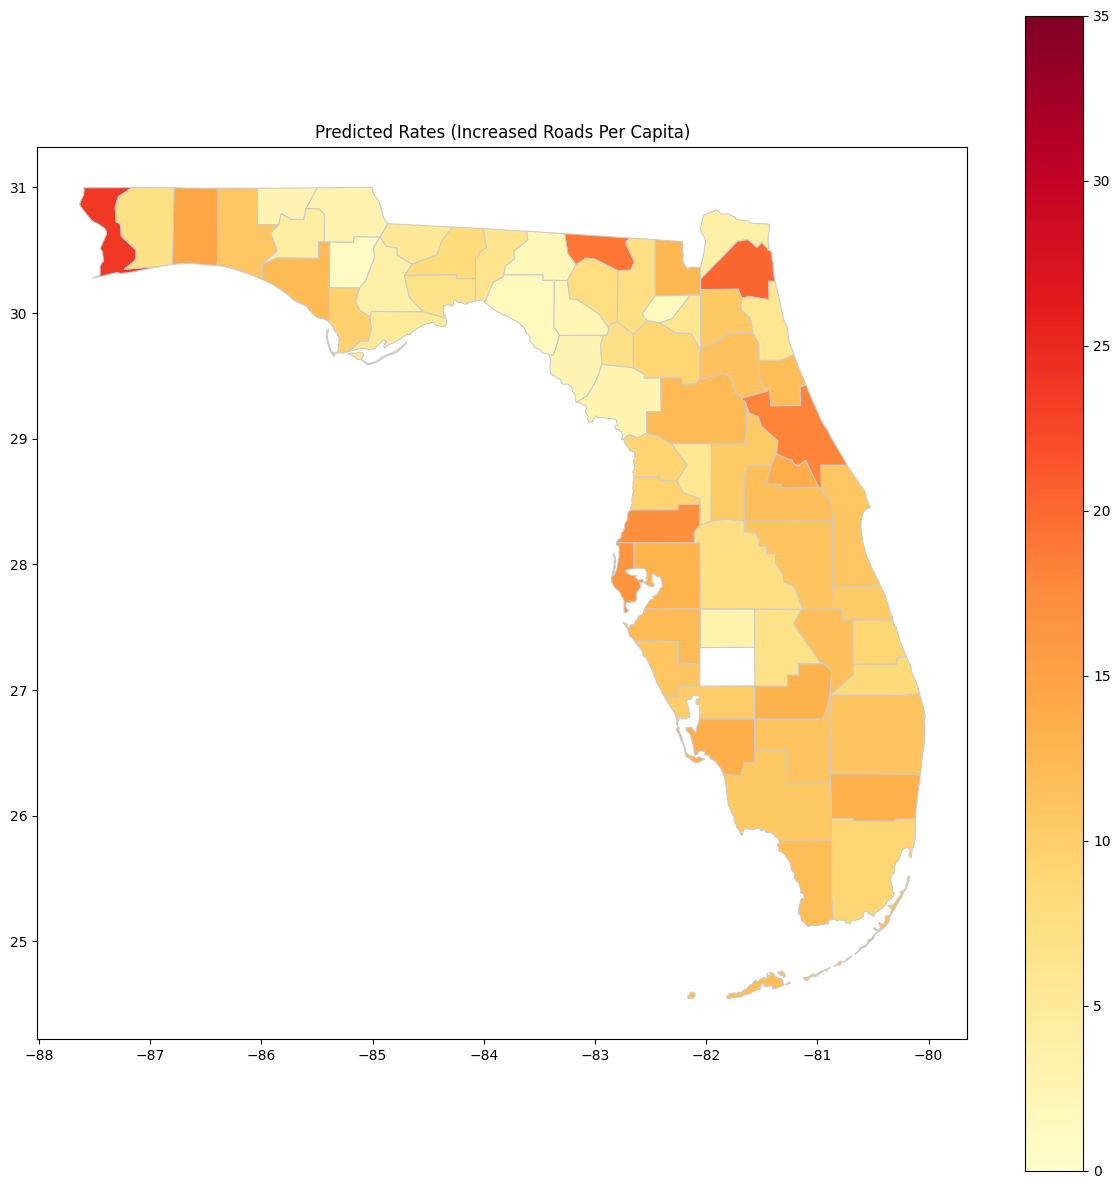

In [26]:
#Predicted rates with 10% more roads per capita
full_pred = model.predict(data[list(matrix.keys()[selected_features])])
merged_data['Fentanyl_deaths_2022'] = full_pred

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Predicted Rates (Increased Roads Per Capita)')

plt.show()

In [27]:
data['Number of Roads'] -= 0.1

In [28]:
from ipywidgets import interactive, widgets
from IPython.display import display

In [29]:
#function to recreate visualization using slider and dropdown

def update_map(threshold, feature):
    # Shift the data based on the threshold
    shifted_data = data.copy()
    shifted_data[feature] = shifted_data[feature] + threshold

    # Predict with the random forest model
    full_pred = model.predict(shifted_data[list(matrix.keys()[selected_features])])
    merged_data['Fentanyl_deaths_2022'] = full_pred

    #plot the new predictions
    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    merged_data.plot(column='Fentanyl_deaths_2022', vmin=0, vmax=35, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    plt.title('Predictions with: ' + feature + ', shifted by: ' + str(threshold))
    plt.show()

In [30]:
# Create a slider widget
slider = widgets.FloatSlider(value=0, min=-0.15, max=0.15, step=0.01, description='Threshold')
# Feature dropdown widget
feature_dropdown = widgets.Dropdown(options=data[list(matrix.keys()[selected_features])], value='Number of Roads', description='Feature')


interactive_plot = interactive(update_map, threshold=slider, feature = feature_dropdown)

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '1000px'
display(interactive_plot)

interactive(children=(FloatSlider(value=0.0, description='Threshold', max=0.15, min=-0.15, step=0.01), Dropdow…